# Análisis de sentimiento y web scraping

El análisis de sentimiento es el proceso de determinar el tono emocional detrás de una serie de palabras. La herramienta de análisis de sentimiento es una técnica automatizada para extraer información significativa de los clientes, relacionada con sus actitudes, emociones y opiniones.  

## ¿Qué es el análisis de sentimiento?
El análisis de sentimiento o sentiment analysis consiste en evaluar las emociones, actitudes y opiniones. Las organizaciones utilizan este método para obtener información que les permita comprender la forma en la que los clientes reaccionan respecto a un producto o servicio específico. 

La herramienta de análisis de sentimiento utiliza tecnologías avanzadas de inteligencia artificial, como procesamiento del lenguaje natural, análisis de texto y ciencia de datos para identificar, extraer y estudiar información subjetiva. En términos más simples, clasifica un texto como positivo, negativo o neutral.

Las métricas tradicionales, como el número de vistas, clics, me gusta, compartir, comentarios, etc. se centran en la cantidad. El análisis de sentimiento va más allá de los números y se centra en la calidad de las interacciones entre el público y la organización.

## ¿Qué es el análisis de sentimiento del cliente?

Si los clientes no están contentos, lo expresan a través de los comentarios que registran en una encuesta de satisfacción del cliente.

Este tipo de encuesta consta de diferentes tipos de preguntas, como las preguntas de opción múltiple o una pregunta Net Promoter Score. Sin embargo, los investigadores recurren a las preguntas abiertas cuando necesitan recolectar comentarios detallados de los consumidores. 

Si hay demasiadas palabras negativas en las respuestas de la encuesta, las empresas pueden tomar las medidas necesarias para abordar sus inquietudes.

El análisis de sentimiento del cliente puede ayudar a responder preguntas como:


* ¿Qué les gusta a nuestros clientes sobre nuestros productos y servicios?

* ¿Qué no les gusta a nuestros clientes de nuestros productos y servicios?

* ¿Recibimos demasiadas respuestas negativas recientemente?

* ¿Ha aumentado gradualmente el número de respuestas negativas?

* ¿Qué producto de marca tiene el mayor número de respuestas positivas?

* ¿El número de respuestas positivas, neutrales y negativas se ha mantenido constante en comparación con el último trimestre?

* ¿Hay un cambio en el grado de respuestas positivas o negativas?

Al realizar un análisis de sentimiento de los clientes, las empresas pueden descubrir si se dirigen en la dirección correcta, medir los niveles de satisfacción del cliente y reducir la tasa de abandono.



Ventajas de hacer un análisis de sentimiento del cliente
Entre las principales ventajas de hacer un análisis de sentimiento se encuentran:

* Te mantiene al tanto de lo que le gusta y de lo que no le gusta a los consumidores de tus productos y servicios.

* Te permite enfocarte en los diferentes segmentos del mercado y crear productos y servicios que los atraigan.

* La herramienta de análisis de sentimiento permite que tu equipo participe en la colaboración y aporte de ideas para el desarrollo de productos, lo cual los motiva y mejora su rendimiento.

* Favorece el análisis de las revisiones o de la retroalimentación del cliente y compararlos con la competencia para comprender en qué puntos hay que realizar mejoras.

* Te ayuda a abordar rápidamente los problemas que enfrentan los clientes al usar tus productos o servicios.

* Permite comprender el estado de ánimo de tus trabajadores a través de encuestas para empleados. De esta forma puedes abordar sus inquietudes ofreciendo una sensación de que su voz es  escuchada y valorada.

* Favorece la reputación de tu marca y la percepción de los clientes.

* Te ayuda a comprender el estado de ánimo de los clientes, así como los efectos que ocurren alrededor de las opiniones de los clientes a lo largo del tiempo.


In [ ]:
!pip install WordCloud Spacy

In [ ]:
!python3 -m spacy download en_core_web_sm
# python -m spacy download en_core_web_sm

In [108]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
# from pattern.en import sentiment

In [109]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r=requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')

In [110]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'


In [111]:
#Extracting the HTML from the request object
html = r.text

# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics: GA4 --><script>var gtCode = 'G-D7R21VYTPB'; // live
                    var gtScriptElement = document.createElement('script')
                    gtScriptElement.src = `https://www.googletagmanager.com/gtag/js?id=${gtCode}&l=GA4DataLayer`;
                    gtScriptElement.onload = OnceLoaded;
                    document.getElementsByTagName('head')[0].appendChild(gtScriptElement);
                    function OnceLoaded() {
       


In [112]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()

#total length
len(text)

4951

In [113]:
print(text[0:1000])

Commercial Companies Advance Space Exploration




Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWatch LiveSearchFollow Us






SpaceHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and m

In [114]:
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

text

'Commercial Companies Advance Space Exploration\n\n\n\n\nScripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWatch LiveSearchFollow Us\n\n\n\n\n\n\nSpaceHow Commercial Companies Are Advancing Space ExplorationThere\'s competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy\xa0Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the \'Starship\' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first ti

In [115]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

sentence


['Commercial Companies Advance Space Exploration     Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWatch',
 'LiveSearchFollow Us       SpaceHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 'How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy\xa0Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT',
 'Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.',
 'Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again.',
 'SpaceX hopes the ship will reach orbit for the fir

In [116]:
print(len(sentence))

34


In [117]:
print(sentence[2])

How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT


## Análisis de sentimiento con Textblob


Textblob es una biblioteca de Python para el procesamiento de texto y NLP. Textblob tiene funciones integradas para realizar análisis de sentimientos. La función devuelve una puntuación de polaridad y subjetividad.

La puntuación de polaridad puede ser positiva o negativa, y la subjetividad varía entre 0 y 1.

Vamos a crear una lista vacía y obtener todos los datos.



In [118]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])


Creamos una lista vacía y todos los datos se introducen correctamente en las listas. Ahora, convertimos esta lista en un marco de datos. Convertirlo en un marco de datos facilita el análisis y el trazado.



In [119]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])


In [120]:
df_textblob.head()


,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.100000,0.150000
1,LiveSearchFollow Us SpaceHow Commercial ...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.000000,0.000000
3,"Oct 29, 2021As astronauts blast off to the Int...",0.050000,0.750000
4,Newly released video shows the Starship liftin...,0.136364,0.454545


Las frases y sus puntuaciones de sentimiento se han formateado en un DataFrame.



In [121]:
df_textblob.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      34 non-null     object 
 1   Polarity      34 non-null     float64
 2   Subjectivity  34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


El DataFrame contiene las 33 oraciones y sus puntuaciones de polaridad y subjetividad.

### Analisis de polaridad
Analicemos primero la polaridad de la oración.



Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

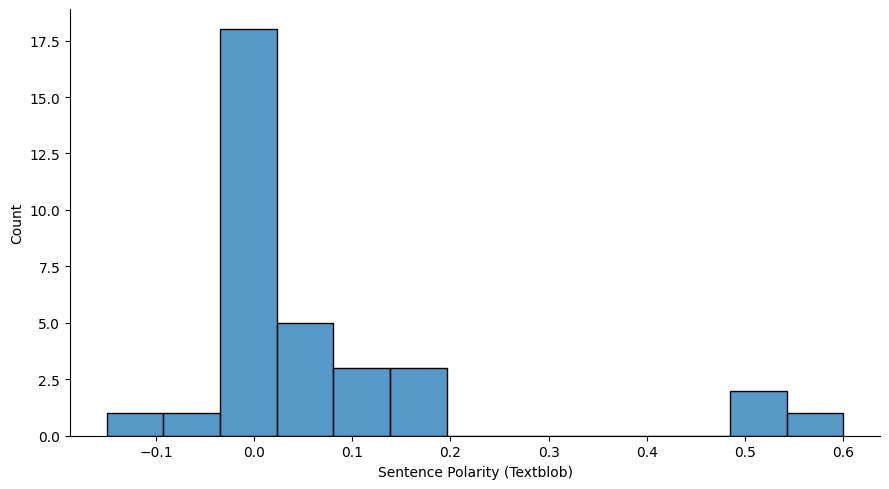

In [122]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")


La mayoría de las oraciones tiene un polaridad cercana a cero por lo que indica que el articulo tiene un lenguaje neutral. Aunque algunas frases sean muy positivas o muy negativas, tiende a estar más regado hacia la derecha por lo que el tono puede ser positivo.

In [123]:
df_textblob["Polarity"].mean()

0.07450980392156863

Ahora miremos la subjetividad

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

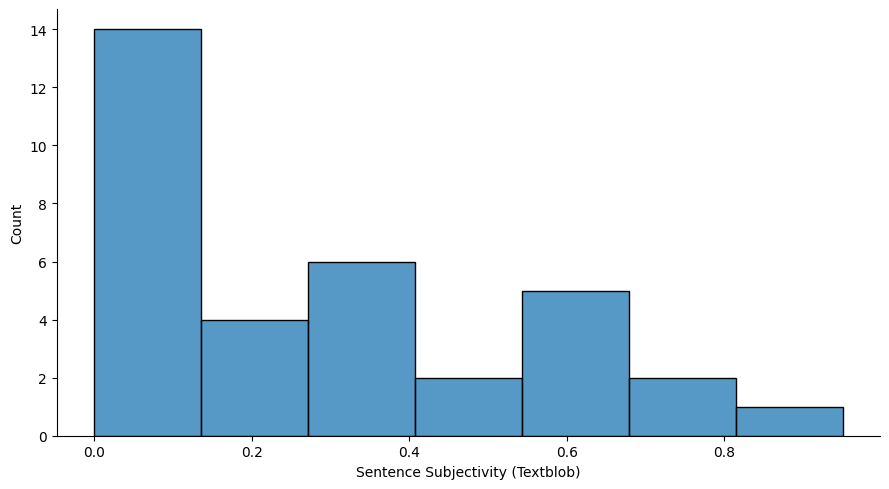

In [124]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")


Los valores de la subjetividad también varían, siendo pocas oraciones altamente subjetivas y la mayoría de las oraciones menos subjetivas.

## Frecuencia de palabras en una nube de puntos

Una buena manera de entender las opiniones e ideas generales del texto es analizando la frecuencia de las palabras y haciendo una nube de palabras. Son excelentes maneras de visualizar el sentimiento expresado por un artículo o un blog.

Comenzamos creando el tokenizador NLTK, el tokenizador convertirá el texto en tokens individuales.



In [125]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')


In [126]:
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)

In [127]:
len(tokens)


794

In [128]:
tokens

['Commercial',
 'Companies',
 'Advance',
 'Space',
 'Exploration',
 'Scripps',
 'Newswatch',
 'livetoggle',
 'menuNewsU',
 'S',
 'NewsLifePoliticsBusinessScience',
 'HealthWorldTechEntertainmentSportsShowsScheduleShow',
 'ListDocumentariesIn',
 'Real',
 'LifeNext',
 'LevelBellingcatAll',
 'DocsInvestigationsAboutTeamViewer',
 'SpotlightHotlineSupportWatch',
 'LiveSearchFollow',
 'Us',
 'SpaceHow',
 'Commercial',
 'Companies',
 'Are',
 'Advancing',
 'Space',
 'ExplorationTheres',
 'competition',
 'among',
 'roughly',
 'a',
 'dozen',
 'private',
 'companies',
 'to',
 'launch',
 'new',
 'space',
 'stations',
 'How',
 'Commercial',
 'Companies',
 'Are',
 'Advancing',
 'Space',
 'ExplorationNASAClayton',
 'SandellBy',
 'Clayton',
 'SandellFacebook',
 'ShareTweetEmailSMSPosted',
 '8',
 '00',
 'p',
 'm',
 'EDT',
 'Oct',
 '29',
 '2021As',
 'astronauts',
 'blast',
 'off',
 'to',
 'the',
 'International',
 'Space',
 'Station',
 'this',
 'weekend',
 'on',
 'a',
 'SpaceX',
 'rocket',
 'the',
 'com

In [129]:
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())


In [131]:
words

['commercial',
 'companies',
 'advance',
 'space',
 'exploration',
 'scripps',
 'newswatch',
 'livetoggle',
 'menunewsu',
 's',
 'newslifepoliticsbusinessscience',
 'healthworldtechentertainmentsportsshowsscheduleshow',
 'listdocumentariesin',
 'real',
 'lifenext',
 'levelbellingcatall',
 'docsinvestigationsaboutteamviewer',
 'spotlighthotlinesupportwatch',
 'livesearchfollow',
 'us',
 'spacehow',
 'commercial',
 'companies',
 'are',
 'advancing',
 'space',
 'explorationtheres',
 'competition',
 'among',
 'roughly',
 'a',
 'dozen',
 'private',
 'companies',
 'to',
 'launch',
 'new',
 'space',
 'stations',
 'how',
 'commercial',
 'companies',
 'are',
 'advancing',
 'space',
 'explorationnasaclayton',
 'sandellby',
 'clayton',
 'sandellfacebook',
 'sharetweetemailsmsposted',
 '8',
 '00',
 'p',
 'm',
 'edt',
 'oct',
 '29',
 '2021as',
 'astronauts',
 'blast',
 'off',
 'to',
 'the',
 'international',
 'space',
 'station',
 'this',
 'weekend',
 'on',
 'a',
 'spacex',
 'rocket',
 'the',
 'com

Ahora, tenemos que eliminar las palabras vacías.

In [132]:
stopwords = nltk.corpus.stopwords.words('english')

In [135]:
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

len(words_new)


493

In [136]:
words_new

['commercial',
 'companies',
 'advance',
 'space',
 'exploration',
 'scripps',
 'newswatch',
 'livetoggle',
 'menunewsu',
 'newslifepoliticsbusinessscience',
 'healthworldtechentertainmentsportsshowsscheduleshow',
 'listdocumentariesin',
 'real',
 'lifenext',
 'levelbellingcatall',
 'docsinvestigationsaboutteamviewer',
 'spotlighthotlinesupportwatch',
 'livesearchfollow',
 'us',
 'spacehow',
 'commercial',
 'companies',
 'advancing',
 'space',
 'explorationtheres',
 'competition',
 'among',
 'roughly',
 'dozen',
 'private',
 'companies',
 'launch',
 'new',
 'space',
 'stations',
 'commercial',
 'companies',
 'advancing',
 'space',
 'explorationnasaclayton',
 'sandellby',
 'clayton',
 'sandellfacebook',
 'sharetweetemailsmsposted',
 '8',
 '00',
 'p',
 'edt',
 'oct',
 '29',
 '2021as',
 'astronauts',
 'blast',
 'international',
 'space',
 'station',
 'weekend',
 'spacex',
 'rocket',
 'company',
 'also',
 'showing',
 'massive',
 'ship',
 'says',
 'one',
 'day',
 'take',
 'travelers',
 'far

Ahora, obtenemos la distribución de frecuencia de las palabras.

In [137]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

Ahora, trazamos los datos.

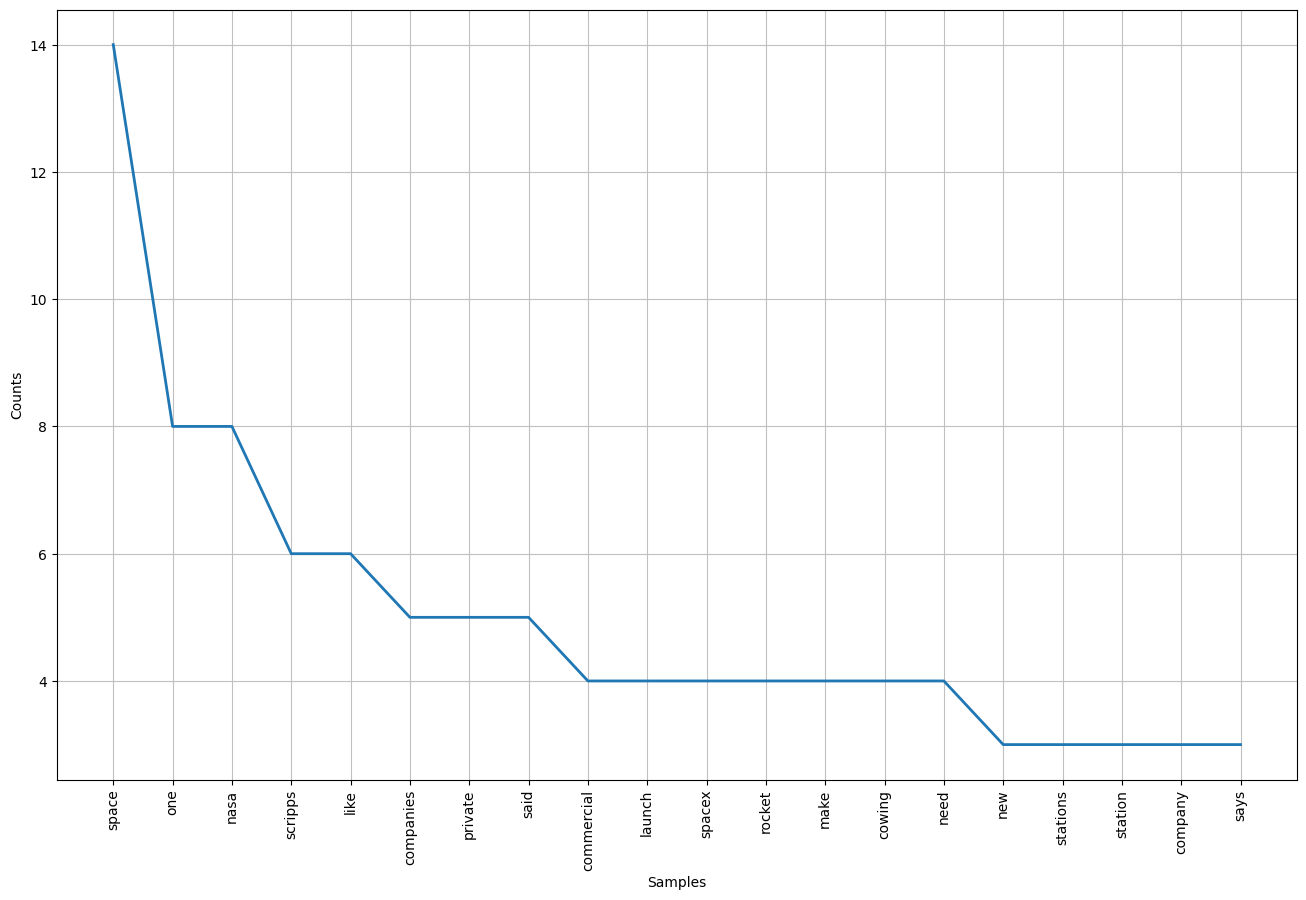

<Axes: xlabel='Samples', ylabel='Counts'>

In [138]:

#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

Vemos que el espacio, la NASA, SpaceX, etc. se pueden ver. Todo esto está relacionado con la exploración espacial y los viajes espaciales.

In [139]:
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])

Ahora, trazamos una nube de palabras con estas palabras de texto.



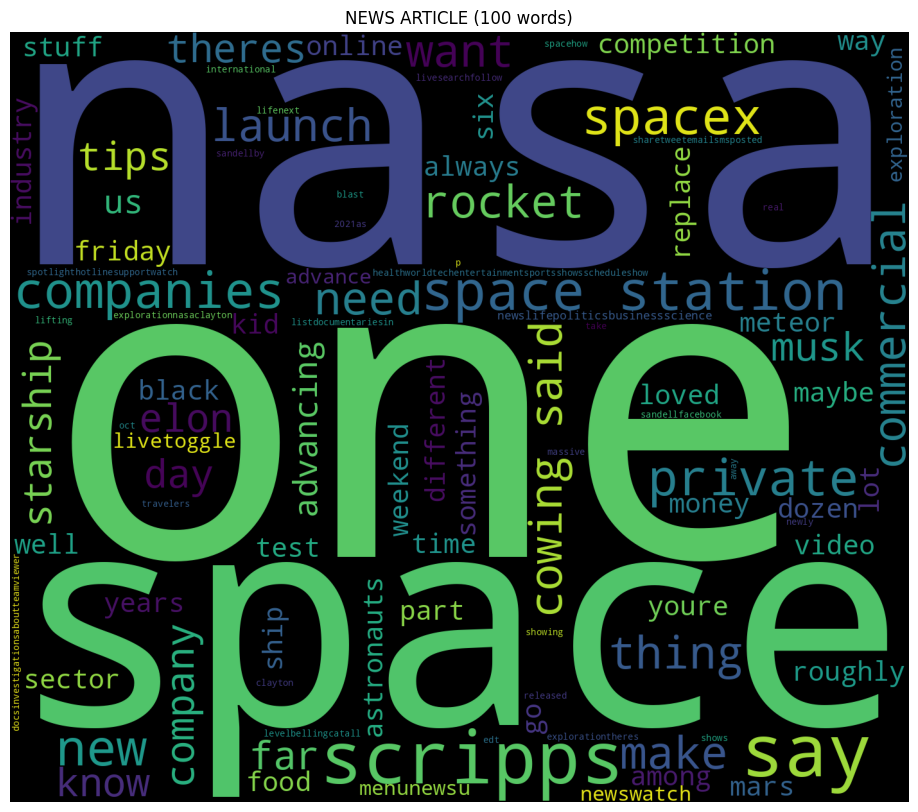

In [140]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()


Entonces, la nube de palabras está trazada y vemos varias cosas relacionadas con la exploración espacial y los viajes espaciales.